# Exploratory Analysis
Tools used in Exploratory Analysis of the workflows

In [1]:
# SUPPRESS WARNING

import warnings
from numba.core.errors import NumbaDeprecationWarning

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=NumbaDeprecationWarning)

### Provide analysis configuration

In [9]:
from src.data.data_parser import WorkflowsImport
from src.helpers.feature_encoder import WORKFLOW_FEATURES

# IMPORT DATA
WORKFLOWS = WorkflowsImport.IMPORT_FROM_CSV("2023")
WORKFLOWS_DB = WorkflowsImport.IMPORT_FROM_DB()

# EXPLORATORY ANALYSIS CONFIGURATION
WORKFLOWS_DISPLAYABLE_DETAILS = [
    WORKFLOW_FEATURES.CPU, 
    WORKFLOW_FEATURES.MEMORY, 
    WORKFLOW_FEATURES.EPHEMERAL_STORAGE, 
    WORKFLOW_FEATURES.STORAGE, 
    WORKFLOW_FEATURES.PROCESSED_SIZE,
    WORKFLOW_FEATURES.DURATION,
    WORKFLOW_FEATURES.STEPS_NO, 
    WORKFLOW_FEATURES.EXECUTED_STEPS_NO
]
STORE_RESULTS = True

### Run analysis

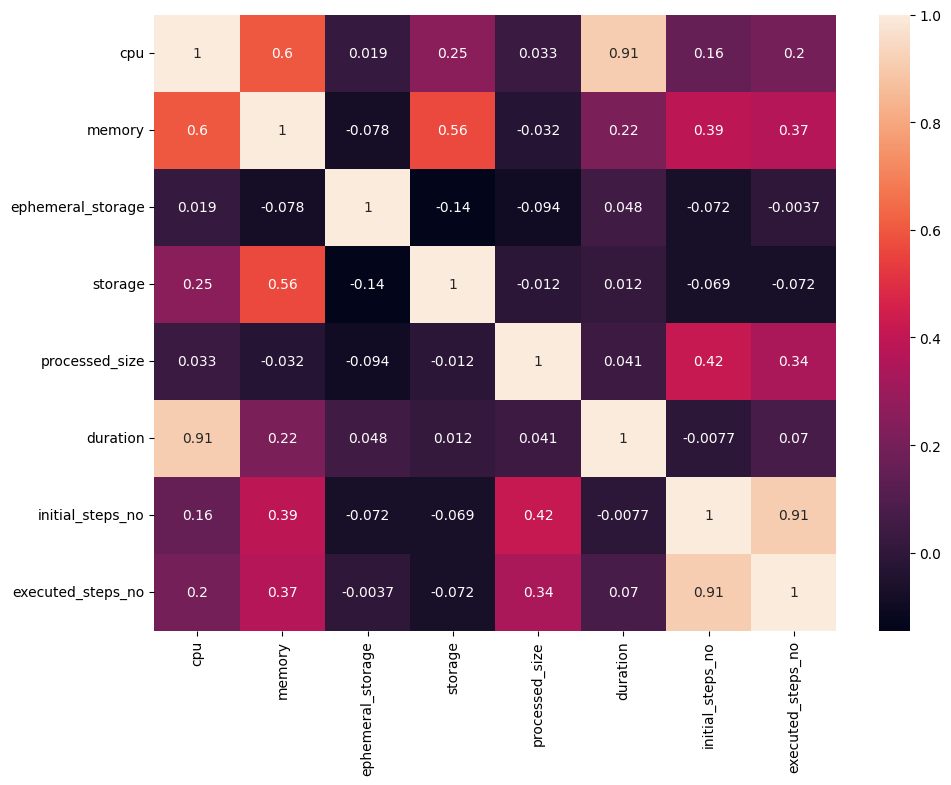

In [13]:
from src.exploratory.exploratory_analysis import ExploratoryAnalysis
from matplotlib import pyplot as plt

from src.helpers.value_reader import FORMATTER_CORR

import seaborn as sns

correlation_metrics = WORKFLOWS[WORKFLOWS_DISPLAYABLE_DETAILS].corr()
        
plt.figure(figsize=(11,8))
sns.heatmap(correlation_metrics, cmap="crest", annot=True)
plt.show()


# exploratory = ExploratoryAnalysis(WORKFLOWS, WORKFLOWS_DB, WORKFLOWS_DISPLAYABLE_DETAILS, STORE_RESULTS)
# exploratory.multivariate_analysis_correlation_matrix()